# Business case

Identify what makes a hit track

In [2]:
pwd

'C:\\Users\\Faith\\Desktop\\Spotify'

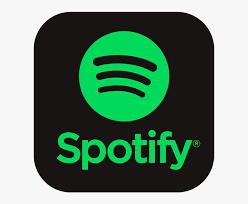

In [5]:
from IPython import display
display.Image('C:/Users/Faith/Desktop/Spotify/images/download.png')

Can we identify what makes a hit track?

# Importing Libraries and Datasets

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=12,8

In [7]:
data= pd.read_csv('Onyx Data - DataDNA Dataset Challenge - July 2021 - Spotify Tracks.csv')

In [8]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# Data preprocessing 

In [9]:
data.shape

(586672, 20)

There are 20 columns and aproximately 589,000 observations in our dataset

In [10]:
data.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

There are 71 missing values in the name column. This would be further investigated. Let's create a variable containing the missing nams against all other columns in the dataset

In [11]:
missing=data.loc[data['name'].isnull(),:]

In [12]:
missing.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.516,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.293,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.115,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.519,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.453,0.608,70.379,4


The names of the songs and the artists are missing. This missing values would be dropped.

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [15]:
data.shape

(586601, 20)

We would be dropping the id and id_artist columns of our dataset

In [16]:
data.drop(labels=['id','id_artists'], axis=1,inplace=True)

In [17]:
data.dtypes

name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

The release_data column needs to be converted to datetime

In [18]:
data['release_date']=pd.to_datetime(data['release_date'])

In [19]:
data.dtypes

name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

There is some dirtiness in our object columns artists. The dirtiness include special characters that needs to be removed

In [20]:
data['artists'].head()

0                ['Uli']
1    ['Fernando Pessoa']
2    ['Ignacio Corsini']
3    ['Ignacio Corsini']
4        ['Dick Haymes']
Name: artists, dtype: object

In [21]:
data['artists']=data['artists'].str.replace('\W', '')

In [22]:
data.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,0,Uli,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,FernandoPessoa,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,Vivo para Quererte - Remasterizado,0,181640,0,IgnacioCorsini,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,El Prisionero - Remasterizado,0,176907,0,IgnacioCorsini,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,Lady of the Evening,0,163080,0,DickHaymes,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [23]:
data.nunique()

name                446474
popularity             101
duration_ms         123120
explicit                 2
artists             113787
release_date         19361
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122702
time_signature           5
dtype: int64

Let us extract the year and month of the release date

In [24]:
data['release_year']=data['release_date'].dt.year
data['release_month']=data['release_date'].dt.month

In [25]:
data.head()

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
0,Carve,6,126903,0,Uli,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,2
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,FernandoPessoa,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,6
2,Vivo para Quererte - Remasterizado,0,181640,0,IgnacioCorsini,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,3
3,El Prisionero - Remasterizado,0,176907,0,IgnacioCorsini,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,3
4,Lady of the Evening,0,163080,0,DickHaymes,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,1


We would then drop the release date column since we have extracted our features from it

In [26]:
data.drop(['release_date'], axis=1, inplace=True)

In [27]:
data.dtypes

name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
release_year          int64
release_month         int64
dtype: object

# Charts

In [28]:
num_column=data.select_dtypes(include=np.number)

In [29]:
num_column.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,2
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,6
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,3
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,3
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,1


In [30]:
len(num_column.columns)

17

Popularity

This is the popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
 

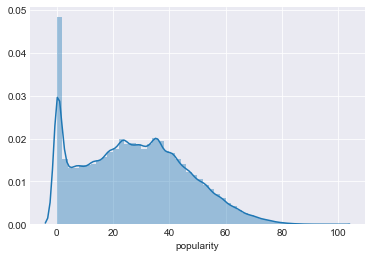

In [31]:
sns.distplot(data['popularity'])
plt.show()

Let"s build a fuction to automate the process

In [32]:
def plot(col):
    sns.distplot(data[col])
    plt.title(f'distribution of {col}')
    plt.figure(figsize=(20,10))
    plt.show()

Duration

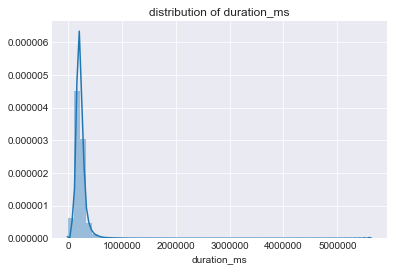

In [33]:
plot('duration_ms')

Danceability

Danceability describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is the most danceable.

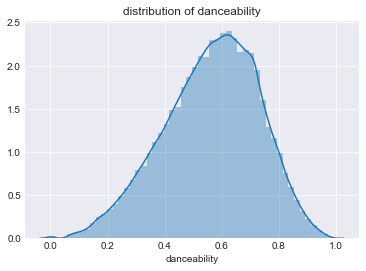

In [34]:
plot('danceability')

In [35]:
def count(col):
    sns.countplot(data=data, x=col)
    plt.title(f'distribution of {col}')
    plt.figure(figsize=(20,10))
    plt.show()

Explicit

0 = No explicit content, 1 = Explicit content

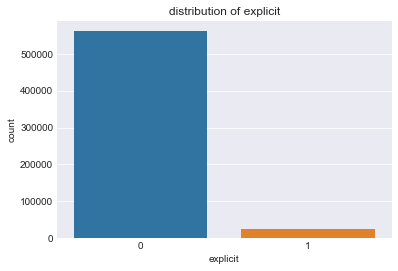

In [36]:
count('explicit')

Most popular artist according to songs

In [37]:
popular=data.nlargest(10,columns= 'popularity')

In [38]:
popular.head()

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
93802,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,JustinBieberDanielCaesarGiveon,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,2021,3
93803,drivers license,99,242014,1,OliviaRodrigo,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,2021,1
93804,Astronaut In The Ocean,98,132780,0,MaskedWolf,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,2021,1
92810,Save Your Tears,97,215627,1,TheWeeknd,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,2020,3
92811,telepatía,97,160191,0,KaliUchis,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,2020,12


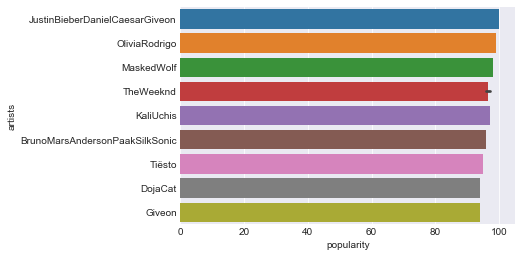

In [39]:
sns.barplot(x='popularity', y='artists', data=popular)

Artist with the highest number of songs ( Top 10)

In [40]:
artists=pd.pivot_table(data=data, values='name', index='artists', aggfunc='count')

In [41]:
artists.head()

,name
artists,
,1
009SoundSystem,1
015B,13
015BBenaddict,2
015BBigman,1


In [42]:
songs=artists.nlargest(10, columns='name')
songs.head()

,name
artists,
Diedrei,3892
TKKGRetroArchiv,2006
BenjaminBlümchen,1503
BibiBlocksberg,1472
LataMangeshkar,1373


In [43]:
songs

,name
artists,
Diedrei,3892
TKKGRetroArchiv,2006
BenjaminBlümchen,1503
BibiBlocksberg,1472
LataMangeshkar,1373
BibiundTina,927
TintinTomasBolmeBertÅkeVarg,905
FranciscoCanaro,891
EllaFitzgerald,870


In [44]:
songs=songs.reset_index()

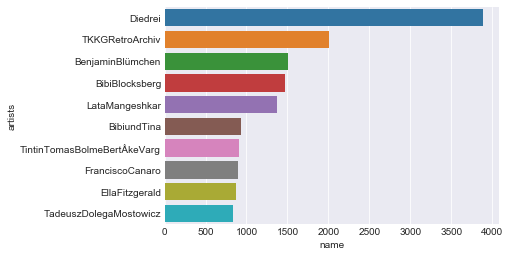

In [45]:
sns.barplot( y='artists', x='name', data=songs)

Diedrei has the  highest total number of songs on spotify as of April 2021

---

Diedrei's release and popularity over the years

In [46]:
Diedrei=data.loc[data['artists']=='Diedrei']

In [47]:
Diedrei.head()

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
52996,005 - und der Fluch des Rubins - Teil 01,44,74240,0,Diedrei,0.514,0.534,2,-10.379,0,0.320,0.00469,0.000004,0.856,0.637,151.043,5,1979,1
52997,005 - und der Fluch des Rubins - Teil 02,44,72240,0,Diedrei,0.656,0.784,5,-9.360,1,0.943,0.77600,0.000000,0.671,0.707,99.387,1,1979,1
53001,005 - und der Fluch des Rubins - Teil 08,44,69880,0,Diedrei,0.708,0.424,3,-10.623,1,0.952,0.62700,0.000000,0.279,0.810,52.668,4,1979,1
53002,005 - und der Fluch des Rubins - Teil 10,44,75760,0,Diedrei,0.734,0.636,4,-10.298,0,0.939,0.77300,0.000000,0.497,0.781,107.459,3,1979,1
53005,005 - und der Fluch des Rubins - Teil 09,44,75480,0,Diedrei,0.702,0.487,5,-9.880,0,0.896,0.68500,0.000000,0.727,0.799,85.884,3,1979,1


In [48]:
pop= Diedrei.groupby('release_year')['name'].count()

In [49]:
pop.head()

release_year
1979    400
1980    440
1981    320
1982     48
1983    120
Name: name, dtype: int64

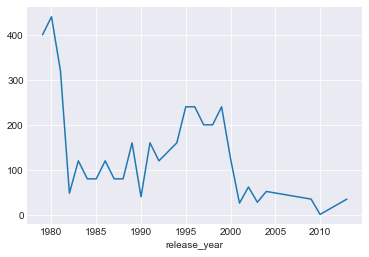

In [50]:
pop.plot()

Diedrei released the highest number of songs in 1980 and the lowest in the year 2010

In [51]:
pop1= Diedrei.pivot_table(index='release_year', values='popularity', aggfunc='mean')

In [52]:
pop1=Diedrei.groupby('release_year')['popularity'].mean()

In [53]:
pop1.head()

release_year
1979    39.795000
1980    37.977273
1981    36.153125
1982    35.208333
1983    35.750000
Name: popularity, dtype: float64

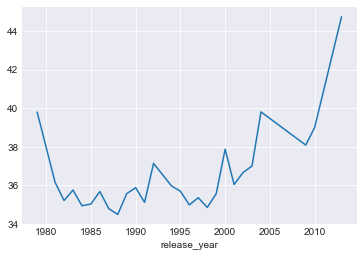

In [54]:
pop1.plot()

Diedrei's popularity has been on the rise over the years with the highest increase in the recent years

Correlation

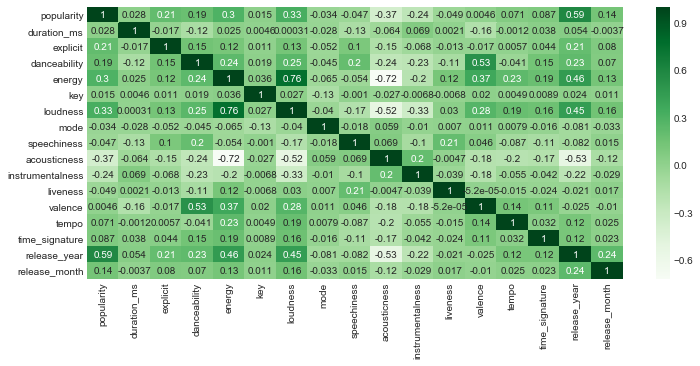

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

There's a high correlation between Energy and Loudness.
Release year and popularity are also highly corelated
Danceability and valence are corelated
Energy and release year are corelated 


Let's check the correlation of other columns in our dataset to popularity

In [56]:
corr=num_column.corr()
cor=corr['popularity'].sort_values(ascending=False).to_frame()

In [57]:
cor

,popularity
popularity,1.000000
release_year,0.590796
loudness,0.327001
energy,0.302178
explicit,0.211749
danceability,0.186878
release_month,0.136916
time_signature,0.086713
tempo,0.071223
duration_ms,0.027638


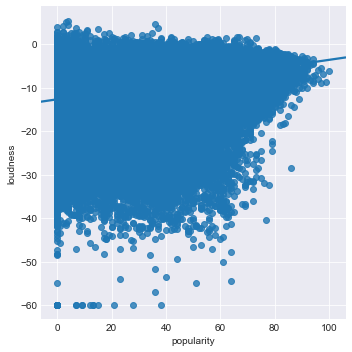

In [58]:
sns.lmplot('popularity','loudness', data)

Most Popular song

In [59]:
data.sort_values('popularity',ascending=False).nlargest(8,columns='popularity')

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
93802,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,JustinBieberDanielCaesarGiveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021,3
93803,drivers license,99,242014,1,OliviaRodrigo,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021,1
93804,Astronaut In The Ocean,98,132780,0,MaskedWolf,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021,1
92811,telepatía,97,160191,0,KaliUchis,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2020,12
92810,Save Your Tears,97,215627,1,TheWeeknd,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,2020,3
93805,Leave The Door Open,96,242096,0,BrunoMarsAndersonPaakSilkSonic,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021,3
92813,Blinding Lights,96,200040,0,TheWeeknd,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,2020,3
92814,The Business,95,164000,0,Tiësto,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2020,9


In [60]:
data[['name','artists','popularity','release_year']].nlargest(10,columns='popularity')

,name,artists,popularity,release_year
93802,Peaches (feat. Daniel Caesar & Giveon),JustinBieberDanielCaesarGiveon,100,2021
93803,drivers license,OliviaRodrigo,99,2021
93804,Astronaut In The Ocean,MaskedWolf,98,2021
92810,Save Your Tears,TheWeeknd,97,2020
92811,telepatía,KaliUchis,97,2020
92813,Blinding Lights,TheWeeknd,96,2020
93805,Leave The Door Open,BrunoMarsAndersonPaakSilkSonic,96,2021
92814,The Business,Tiësto,95,2020
91866,Streets,DojaCat,94,2019
92816,Heartbreak Anniversary,Giveon,94,2020


The most popular song is Peaches by Justin Bieber

Most Popular Artist

In [61]:
data.columns

Index(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'release_year', 'release_month'],
      dtype='object')

Audio characteristics over the years

A Dataframe containing the mean of 'energy','acousticness','danceability','loudness', 'speechiness' and 'valence' by each year would be created.

In [62]:
audio_characteristics=data.groupby('release_year')[['energy','acousticness','danceability','loudness', 'speechiness'
                                                    ,'valence', 'duration_ms']].mean()

In [63]:
audio_characteristics.reset_index(inplace=True)

In [64]:
audio_characteristics.head()

,release_year,energy,acousticness,danceability,loudness,speechiness,valence,duration_ms
0,1900,0.791000,0.139000,0.659000,-4.895000,0.029500,0.956000,233920.000000
1,1922,0.329083,0.892674,0.541207,-14.073036,0.258699,0.572387,165202.184783
2,1923,0.266977,0.859965,0.637332,-16.351921,0.552072,0.671967,156975.914764
3,1924,0.356725,0.866266,0.593344,-13.290367,0.375208,0.554935,189111.306477
4,1925,0.263749,0.912170,0.617391,-14.977595,0.305693,0.635196,189370.960133


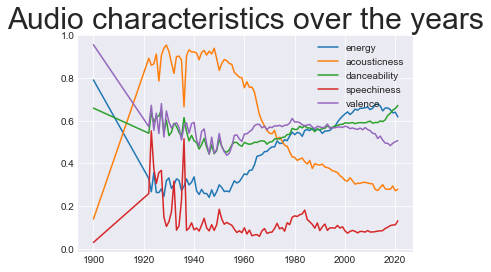

In [65]:
plt.plot('release_year','energy', data=audio_characteristics)
plt.plot('release_year','acousticness',data=audio_characteristics) 
plt.plot('release_year','danceability', data=audio_characteristics)
plt.plot('release_year','speechiness', data=audio_characteristics)
plt.plot('release_year', 'valence', data=audio_characteristics)
plt.legend()
plt.title('Audio characteristics over the years', size=30)
plt.show()

Accousticness which was on the rise in the early 1900's has dropped significantly over the years.
Songs contain low speechiness but the level of speechiness flunctuated between 1900 to 1940.
Energy trend has been on the rise from 1950s
Danceability and Valence have been somewhat steady over the years

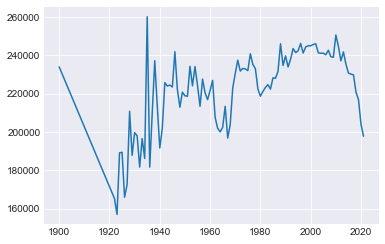

In [66]:
plt.plot('release_year', 'duration_ms', data=audio_characteristics)

Highest duration of songs were released in the 1930s while the lowest was in the 1920s. 

Release Year

In [67]:
pop_by_date=pd.pivot_table(data=data,values='name',index='release_year', aggfunc='count' )

In [68]:
pop_by_date.head()

,name
release_year,
1900,1
1922,276
1923,657
1924,633
1925,903


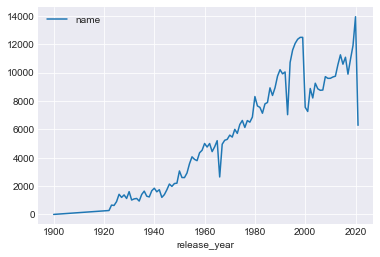

In [69]:
pop_by_date.plot()

So far, the highest number of songs were released in 2020 

In [70]:
release_per_month= pd.pivot_table(data=data,index='release_month', values='name', aggfunc='count')

In [71]:
release_per_month.head()

,name
release_month,
1,271768
2,21908
3,29066
4,26632
5,25980


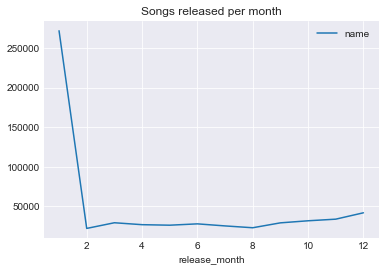

In [72]:
release_per_month.plot(title='Songs released per month')
plt.show()

Over three hundred thousand songs were released in the month of January over the years. Most songs were released in January

# Machine Learning Models

The goal is to design a ML Model that can predict the popularity based on the features available. All the features available are in numerical form so we do not need to perform encoding. We would use the feature selection technique to determine the features that would be used to build the model. Since our target is continous, we would be using the f_regression in our SelectKBest model

In [73]:
from sklearn.feature_selection import SelectFromModel

In [74]:
from sklearn.linear_model import Lasso

In [75]:
model= SelectFromModel(Lasso(alpha=0.05, random_state=0))

In [76]:
y=data['popularity']
X= data.drop(['popularity','name', 'artists'], axis=1)

In [77]:
model.fit_transform(X,y)

array([[0.000e+00, 6.450e-01, 4.450e-01, ..., 3.000e+00, 1.922e+03,
        2.000e+00],
       [0.000e+00, 6.950e-01, 2.630e-01, ..., 1.000e+00, 1.922e+03,
        6.000e+00],
       [0.000e+00, 4.340e-01, 1.770e-01, ..., 5.000e+00, 1.922e+03,
        3.000e+00],
       ...,
       [0.000e+00, 5.350e-01, 3.140e-01, ..., 4.000e+00, 2.020e+03,
        9.000e+00],
       [0.000e+00, 6.960e-01, 6.150e-01, ..., 4.000e+00, 2.021e+03,
        3.000e+00],
       [0.000e+00, 6.860e-01, 7.230e-01, ..., 4.000e+00, 2.015e+03,
        7.000e+00]])

In [78]:
model.get_support()

array([False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True])

In [79]:
cols=X.columns

In [80]:
selected_features=cols[model.get_support()]

In [81]:
selected_features

Index(['explicit', 'danceability', 'energy', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'release_year', 'release_month'],
      dtype='object')

Let's update our X columns

In [82]:
X=X[selected_features]

In [83]:
X.head()

,explicit,danceability,energy,loudness,mode,acousticness,instrumentalness,liveness,tempo,time_signature,release_year,release_month
0,0,0.645,0.4450,-13.338,1,0.674,0.7440,0.151,104.851,3,1922,2
1,0,0.695,0.2630,-22.136,1,0.797,0.0000,0.148,102.009,1,1922,6
2,0,0.434,0.1770,-21.180,1,0.994,0.0218,0.212,130.418,5,1922,3
3,0,0.321,0.0946,-27.961,1,0.995,0.9180,0.104,169.980,3,1922,3
4,0,0.402,0.1580,-16.900,0,0.989,0.1300,0.311,103.220,4,1922,1


 Linear regression

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm=LinearRegression()

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [88]:
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

In [89]:
from sklearn.metrics import r2_score, f1_score,precision_score

In [90]:
r2_score(y_test,pred)

0.3731606744581506

In [91]:
lm.score(X_train, y_train)

0.37594382222811906

Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rcf=RandomForestRegressor(max_depth=3)

In [94]:
rcf.fit(X_train,y_train)
predict=rcf.predict(X_test)

In [95]:
r2_score(y_test,predict)

0.38297682665380306

In [96]:
rcf.score(X_train, y_train)

0.3849388274630897

Decison tree

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dct=DecisionTreeRegressor(max_depth=3)

In [99]:
dct.fit(X_train,y_train)
p=dct.predict(X_test)

In [100]:
r2_score(y_test,p)

0.38256494968181654

In [101]:
dct.score(X_train, y_train)

0.38455220287255487

Using the score function of each model to evaluate the model showed that the models are not doing great. We would select the random forest model and perform hyparameter tuning to improve the accuracy of our model.

In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [103]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

To generate a random number between 0 and 20

In [106]:
import random
max_depth=random.sample(range(0,20),5)

In [107]:
max_depth

[13, 8, 12, 15, 2]

In [118]:
param_grid={
    'n_estimators':[5,10,15,20,25],
    'max_depth':max_depth}

In [124]:
grid=RandomizedSearchCV(rcf,param_distributions={
    'n_estimators':[5,10,15,20,25],
    'max_depth':max_depth},cv=3)
                

In [126]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [13, 8, 12, 15, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [128]:
grid.best_params_

{'max_depth': 13, 'n_estimators': 25}

In [129]:
predictions=grid.predict(X_test)

In [130]:
r2_score(y_test,predictions)

0.4916322911654908

The model accuracy has increased from 0.38 to 0.49. Despite the fact that Parameter hypertuning helped increase our model accuracy, our model accuracy is still quite low.